In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [80]:
# current stock Interests: GPU, Car Scene with Tesla, Comparing companies such as Google, Microsoft, Amazon, and Meta, Streaming services such as Netflix etc...

# Good Guide: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#4.-What-was-the-correlation-between-different-stocks-closing-prices? 

# Kaggle Dataset Stock History Choices this week: 
# Nvidia = https://www.kaggle.com/datasets/kalilurrahman/nvidia-stock-data-latest-and-updated (might be too much and only goes up to 2021)
# Tesla = https://www.kaggle.com/datasets/muhammadibrahimqasmi/tesla-stock-insights-and-predictions/data 
# Google = https://www.kaggle.com/datasets/muhammadibrahimqasmi/google-stock-dataset 

# Possible list of Stock apis: https://patrickalphac.medium.com/stock-api-landscape-5c6e054ee631
# Yahoo Finance?

# Current Stocks API: https://finnhub.io 

# S&P 500 Current stocks daily updated: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data 

In [81]:
# can do baseline data analysis for now but is suggested to use up to date data next week around
# Yahoo Finance?
# how to update csv file with api data

# Stock Market Analysis between AWS, Google, Amazon, Microsoft, Apple, Meta

# Analysis between CPU manufacturers Intel and AMD

# Nvidia

# Analysis betweenn E-Car Manufacturers, Tesla as one

In [82]:
# Nvidia Analysis, past 5 years
df_nvidia = pd.read_csv("NvidiaStock/NVDA.csv")

## Data Cleaning

In [83]:
df_nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,45.777500,46.202499,45.115002,45.117500,44.811085,35428000
1,2019-05-02,45.215000,46.217499,44.779999,45.797501,45.486473,39468400
2,2019-05-03,45.882500,45.982498,45.132500,45.752499,45.441776,33682400
3,2019-05-06,43.875000,45.084999,43.500000,44.962502,44.657139,42217600
4,2019-05-07,44.474998,44.474998,42.792500,43.277500,42.983582,55522000


In [84]:
df_nvidia.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,51220800
1255,2024-04-25,788.679993,833.229980,782.229980,826.320007,826.320007,42464100
1256,2024-04-26,838.179993,883.309998,833.869995,877.349976,877.349976,54667300
1257,2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
1258,2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36055200


In [85]:
# Maybe grab the Date and highest price it was at during each date?
df_nvidia.info()

# Open: Opening Price of a stock, first price when stock market opens
# High: Highest price the stock was at during trading day
# Low: Lowest price the stock was at duirng trading day
# Close: Closing price of a stock, final price before trades close
# adj Close: this is the closing price of a stock adjusted for factors such as dividends, stock splits, and other corporate actions that may affect the price
# Volume: The total number of shares or contracts traded during the period

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [86]:
df_nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Analysis

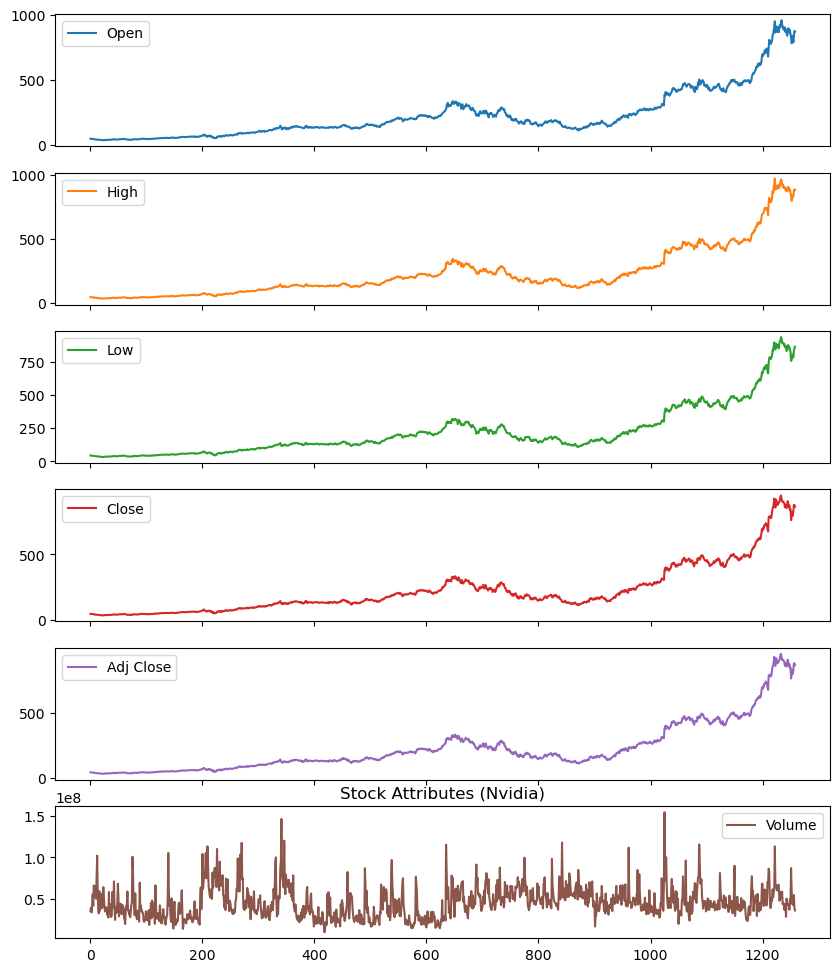

In [87]:
df_nvidia.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

It can be seen that the trends between all data points aside volume are largely the same. Too little dilation from each other, this could mean that Nvidia has been on a steady rise throughout Covid but had a massive spike near 2024.

In [152]:
fig = px.line(df_nvidia, x = 'Date', y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

Judging from the chart, there was a spike in November 2021 that lines up with the rise of AI and ChatGPT. With GPUs being a major asset to running and processing AI. January 2022 to September 2022 was Nvidia's 52 week low after the US imposed restrictions on the export of AI chips to China and Russia. The 239% rise in 2023 could be due to the fervor over generative AI reaching a peak height. Nvidia skyrocketed again in 2024 over further AI demand. There are high chances that Nvidia may reach the $1000 stock price soon if it continues to rise. But has stayed stagnant below $900.

In [149]:
fig = px.line(df_nvidia, x = 'Date', y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

We see two noticeable spikes in trades in May 2023 and September 2020. December 2020 has the lowest time in trades between 2019 and 2024. In 2024, the high cost in the stock may be the reason as to why it is so low in trade volume.

In [151]:
# Nvidia Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_nvidia.index, open=df_nvidia['Open'], high=df_nvidia['High'], low=df_nvidia['Low'], close=df_nvidia['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Judging from the stagnation and possible decline in the stock, it may be a good time to invest into the stock before it has the chance to rise again and before the AI boom calms down further.

<Axes: xlabel='Adj Close', ylabel='Volume'>

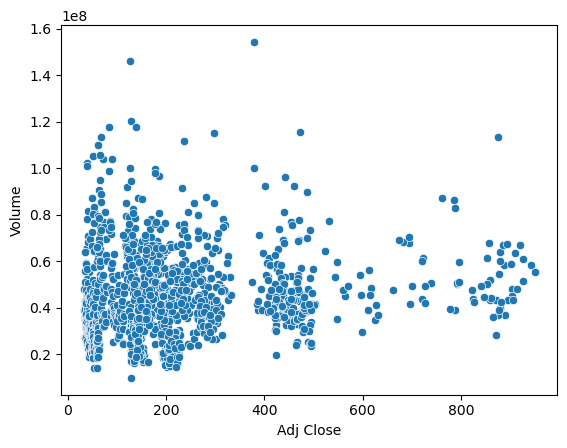

In [90]:
sns.scatterplot(df_nvidia, x='Adj Close', y='Volume')

High volume of trades were in the lower area, but sudden rise mainly occurred during 2023. The highest volume of purchases during a trading session happening when stock price was below 400 dollars, less trades seemed to occur after

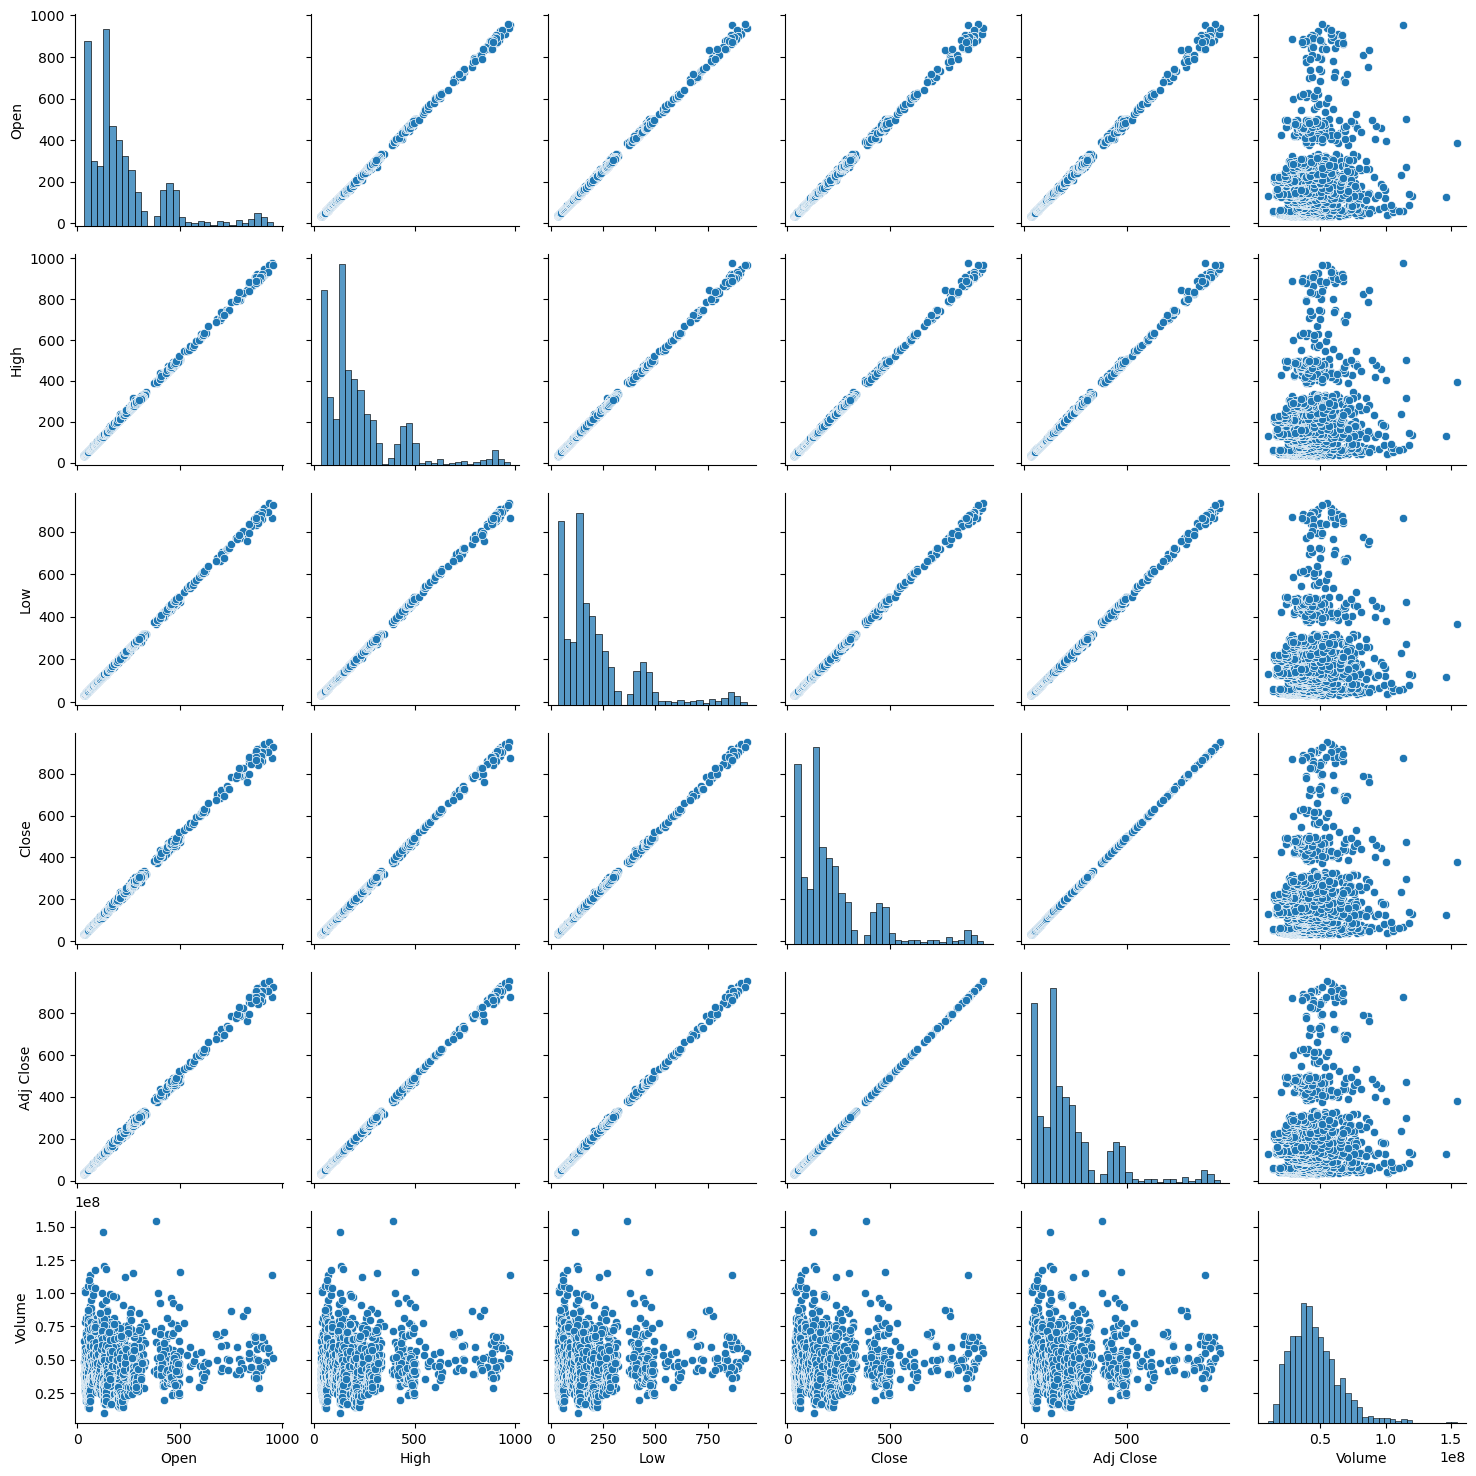

<Figure size 1000x1200 with 0 Axes>

In [91]:
sns.pairplot(df_nvidia)
plt.figure(figsize=(10,12))
plt.show()

## Data Preprocessing

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [93]:
df_nvidia['Date'] = pd.to_datetime(df_nvidia['Date'])

## Prediction Model

In [121]:
X = df_nvidia[['Date','High', 'Low', 'Adj Close']]  # Features
y = df_nvidia['Open']  # Target variable

In [122]:
opening_price = df_nvidia[['Open']].values

In [123]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(opening_price)

In [124]:
# window size for sequences
window_size = 30 #(window of values that can be looked back on)

In [125]:
# Create sequences
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

In [126]:
X, y = np.array(X), np.array(y)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Define the LSTM model
model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(window_size, 1), return_sequences=True),
    LSTM(units=64, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [129]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - loss: 0.0313 - val_loss: 0.0015
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0011 - val_loss: 6.9364e-04
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 5.6615e-04 - val_loss: 5.7336e-04
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 5.2010e-04 - val_loss: 5.0022e-04
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.8294e-04 - val_loss: 4.4837e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.6454e-04 - val_loss: 4.3110e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.1504e-04 - val_loss: 3.6176e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 4.1046e-04 - val_loss: 3.8961e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.2350e-04 - val_loss: 3.1113e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.5499e-04 - val_loss: 3.3869e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3.4641e-04 - val_loss

In [130]:
# Evaluate the model on testing data
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.8026e-04
Test Loss: 0.00015547414659522474


In [131]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step


In [132]:
scaled_pred = scaler.inverse_transform(y_pred)

In [133]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2) Score:', r2)


Mean Squared Error: 0.0001554741564081271
Root Mean Squared Error: 0.012468927636654529
R-squared (R2) Score: 0.9963016546187966


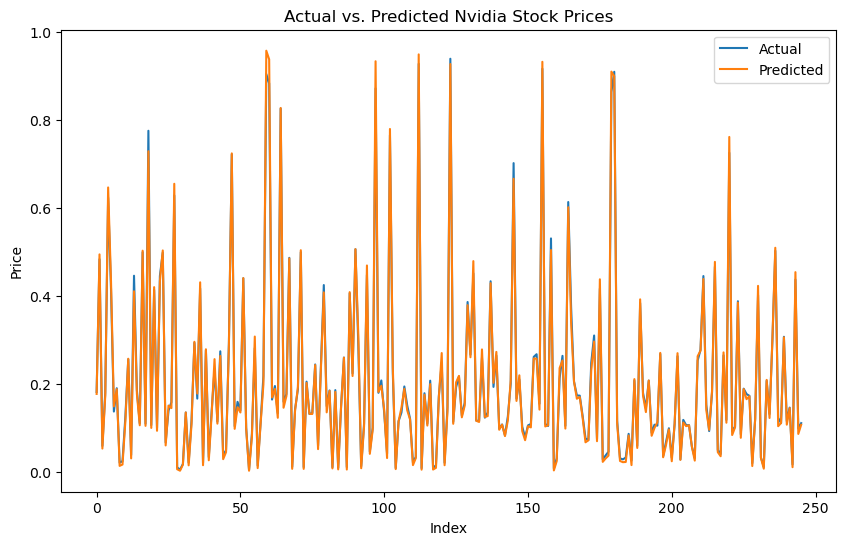

In [134]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Nvidia Stock Prices')
plt.legend()
plt.show()

## Prediction

In [135]:
def preprocess_input_data(data):
    price = data['Price']
    #scale the price using min max scaling
    scaled_price = scaler.fit_transform([[price]])[0][0] #fit and transform
    date = data['Date']
    return scaled_price

In [158]:
next_day_data = {
    'Date': '2024-05-02', # date for next day
    'Price': '830.41' # historical price data from the day before
}

scaled_input_data = preprocess_input_data(next_day_data)

In [154]:
# Reshape the input data to match the model's input shape
reshaped_input_data = np.array([scaled_input_data]).reshape(1, 1, 1)

In [155]:
# Generate prediction for the next day's price
predicted_price = model.predict(reshaped_input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [156]:
# Inverse-transform the prediction to get the predicted price in the original scale
predicted_price_original_scale = scaler.inverse_transform(predicted_price)[0][0]

In [157]:
print('Predicted Price for the Next Day:', predicted_price_original_scale)

Predicted Price for the Next Day: 864.0689


Under my analysis, Nvidia would not be ideal for a short-term investment but would be better as a long-term investment. With its boom coming from the AI boom in late 2021. It has had moments of reaching lows such as in 2022 by outside factors such as the government. But early 2024 has seen the company have a large boom in its stock price, soaring to reach more than $900 dollars a few points in time. It may be an opportune time soon due to an uninspiring announcement by AMD that had also affected Nvidia too in 5/1/24. Causing the stock to have a sudden drop. It may soon be the best time to invest before Nvidia can recover again.